# Parcial 1 - Parte práctica

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
predTarjeta = pd.read_csv('Prediccion_Tarjeta.csv')
datosTarjeta = pd.read_csv('Datos_Tarjeta_Credito.csv')

### Pregunta 1: Problema de Decisión

**Pregunta 1**. Plantear como un problema de decisión

* *Espacio de opciones*: Se le ofrece o no se le ofrece al cliente la campaña
* *Espacio de eventos*: Paga o no paga la deuda
* *Consecuencias*: Perdemos 3000 o ganamos Deuda/2 - 3000

### Procesamiento de datos

In [3]:
predTarjeta.shape

(3000, 23)

In [7]:
datosTarjeta.shape

(27000, 24)

In [8]:
predTarjeta.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,60000,1,2,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1,60000,1,3,2,44,0,0,0,0,0,...,59198,31437,32113,33591,2300,2600,1600,1200,2000,1300
2,50000,2,3,1,48,0,0,0,0,-1,...,7857,3181,2430,780,1800,1506,6,2430,780,0
3,50000,1,3,1,48,0,0,0,0,0,...,42248,33855,28064,29660,5000,2000,2500,2500,2000,2500
4,130000,2,2,2,27,0,0,0,0,0,...,110317,108099,106028,104253,5578,4000,3863,3831,4136,5385


In [109]:
datosTarjeta.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y,y2
0,490000,2,1,2,28,0,0,0,0,0,...,118899,79223,10041,7415,7025,44324,3119,2780,0,1
1,140000,1,1,2,25,-1,-1,-1,-1,-1,...,2561,1440,1844,1311,643,2561,1440,1582,0,1
2,100000,1,1,2,28,0,0,0,0,0,...,6741,-24,1400,1506,1209,0,0,0,0,1
3,500000,1,1,1,39,0,0,0,0,0,...,28926,11931,30006,23016,566,22323,11931,10683,0,1
4,550000,2,1,1,53,0,0,0,0,0,...,218096,210264,7110,7353,7534,7385,7253,15000,0,1


In [136]:
lista_iniciales = datosTarjeta.LIMIT_BAL
lista_unica = datosTarjeta.LIMIT_BAL.unique()
c=[]
p=[]

for x in lista_unica:
    n = 0
    m=0
    for i in range(0, len(lista_iniciales)):
        if lista_iniciales[i] == x:
            n += 1
            if datosTarjeta.y[i]==1:
                m+=1
    c.append(n)
    p.append(m)

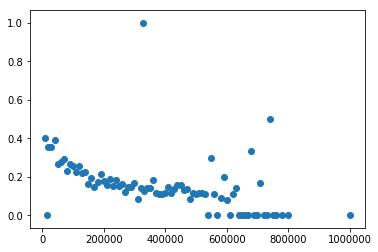

In [137]:
plt.scatter(lista_unica,[x/y for x,y in zip(p,c)])

### Modelado

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    datosTarjeta.drop(['y'], axis=1), # X
    datosTarjeta.y,  # y
    test_size=0.2, # porcentaje que será prueba
    random_state=42) # para fijar el aleatorio (reproducibilidad)

#### Random Forest

In [7]:
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [8]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
f1_score(y_test, rf.predict(X_test))

0.45285029302077784

In [112]:
rf_cv=[]
for i in range (1, 10):
    print(i)
    rf = rf = RandomForestClassifier(n_estimators=50, min_samples_split=i*10)
    rf_cv.append(
        cross_val_score(rf,
                        X_train,
                        y_train,
                        cv=5,
                        scoring='f1').mean())

1
2
3
4
5
6
7
8
9


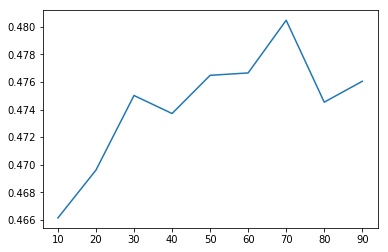

In [114]:
plt.plot([x*10 for x in range(1,10)], rf_cv)
plt.show()

In [117]:
grid={
    'min_samples_split': [x for x in range (60,70)]
}
rf_cv=GridSearchCV(rf, grid, n_jobs=-1, cv=5, verbose=2, scoring='f1')
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   59.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=90,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [118]:
rf_cv.best_params_

{'min_samples_split': 68}

In [119]:
f1_score(y_test, rf_cv.predict(X_test))

0.4541963795940757

In [120]:
rf_cv.best_score_

0.47817801993273257

In [121]:
confusion_matrix(y_test,rf_cv.predict(X_test))

array([[3991,  206],
       [ 789,  414]], dtype=int64)

#### KNN

In [81]:
knn = KNeighborsClassifier(3)

In [82]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [85]:
f1_score(y_test, knn.predict(X_test))

0.29331993972877957

In [84]:
confusion_matrix(y_test,knn.predict(X_test))

array([[3701,  496],
       [ 911,  292]], dtype=int64)

In [74]:
knn_cv=[]
for i in range (1, 20):
    print(i)
    knn =  KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn_cv.append(
        cross_val_score(knn,
                        X_train,
                        y_train,
                        cv=5,
                        scoring='f1').mean())

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


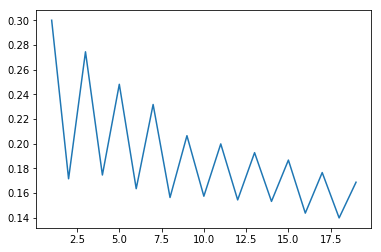

In [75]:
plt.plot(range(1,20), knn_cv)
plt.show()

#### Logistic Regression

In [122]:
lr = LogisticRegression(solver = 'liblinear')

In [123]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
f1_score(y_train, lr.predict(X_train))

0.0

In [125]:
confusion_matrix(y_test,lr.predict(X_test))

array([[4197,    0],
       [1203,    0]], dtype=int64)

#### Decision Tree

In [98]:
dt = DecisionTreeClassifier(max_depth=5)

In [99]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
f1_score(y_test, dt.predict(X_test))

0.4301929625425653

In [96]:
dt_cv=[]
for i in range (5, 30):
    dt = DecisionTreeClassifier(max_depth=i)
    dt_cv.append(
        cross_val_score(dt,
                        X_train,
                        y_train,
                        cv=5,
                        scoring='f1').mean())

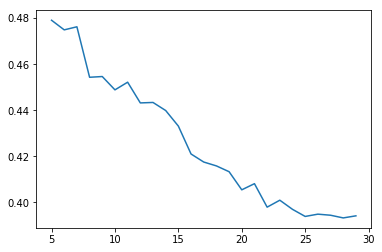

In [97]:
plt.plot([x for x in range(5,30)],dt_cv)
plt.show()

##### Cross-Val Score

In [126]:
#KNN
cross_val_score(knn, X_train, y_train, cv=5, scoring='f1').mean()

0.2744749014665372

In [128]:
#Logistic Regression
#Dice no tener bien implementado f1_score y le asigna 0
#Se calcula el accuracy pero la matriz no está balanceada
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.7781018518518519

In [105]:
#Decision Tree
cross_val_score(dt, X_train, y_train, cv=5, scoring='f1').mean()

0.4790882321411133

In [106]:
#Random Forest
cross_val_score(rf, X_train, y_train, cv=5, scoring='f1').mean()

0.4578326176378262

### Mejor modelo - Random Forest

**Pregunta 2**. Crear un estimador para los eventos inciertos

* *Modelo*: Random Forest por tener el mayor f1 score con los test y un nivel decente de cross_val_score

In [132]:
rf_final=rf_cv.best_estimator_

In [133]:
rf_final.fit(datosTarjeta.drop('y', axis=1), datosTarjeta.y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=68,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
costo=3000
proba_pago=0.5
condonar=0.5

In [162]:
decision_df=pd.DataFrame({
    'y_class': rf_final.predict(predTarjeta),
    'deuda': predTarjeta.BILL_AMT1,
    'y_proba': rf_final.predict_proba(predTarjeta)[:,1],
    'utilidad': predTarjeta.BILL_AMT1*condonar*proba_pago -costo
})

In [163]:
c=decision_df.loc[decision_df['y_class'] == 1]
c.head()

,y_class,deuda,y_proba,utilidad
21,1,291410,0.574184,69852.50
24,1,60455,0.732682,12113.75
26,1,38503,0.816414,6625.75
40,1,1548,0.513808,-2613.00
54,1,109887,0.646714,24471.75


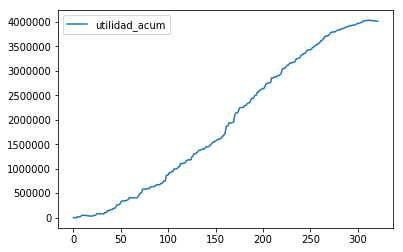

In [164]:
(
    c
    .sort_values(by='y_proba', ascending=True)
    .assign(utilidad_acum = lambda x: x.utilidad.cumsum())
    .reset_index()
    .plot(y='utilidad_acum')
)
plt.show()

**Pregunta 3**. Encuentra el número de clientes a los cuales debes ofrecer el esquema

* *Clientes*: 312


In [268]:
(
    c
    .sort_values(by='y_proba', ascending=True)
    .assign(utilidad_acum = lambda x: x.utilidad.cumsum(),
            n_clientes = lambda x: x.y_class.cumsum())
    .assign(max_roi = lambda x: x.utilidad_acum.max())
    .query('utilidad_acum == max_roi')
)

,y_class,deuda,y_proba,utilidad,utilidad_acum,n_clientes,max_roi
1339,1,40959,0.843515,7239.75,4032300.0,312,4032300.0


In [278]:
ptg=np.linspace(0,1,101)

In [279]:
x=0
i=0
for x in ptg:
    pro=x
    cond=x

    df=pd.DataFrame({
    'y_class': rf_final.predict(predTarjeta),
    'deuda': predTarjeta.BILL_AMT1,
    'y_proba': rf_final.predict_proba(predTarjeta)[:,1],
    'utilidad': predTarjeta.BILL_AMT1*(1-cond)*pro -costo
    })
    
    
    f=df.loc[decision_df['y_class'] == 1]
    print(x)
    print(
    f
    .sort_values(by='y_proba', ascending=True)
    .assign(utilidad_acum = lambda x: x.utilidad.cumsum(),
            n_clientes = lambda x: x.y_class.cumsum())
    .assign(max_roi = lambda x: x.utilidad_acum.max())
    .query('utilidad_acum == max_roi')
    )

0.0
      y_class  deuda  y_proba  utilidad  utilidad_acum  n_clientes  max_roi
2119        1  12925   0.5004   -3000.0        -3000.0           1  -3000.0
0.01
      y_class  deuda  y_proba   utilidad  utilidad_acum  n_clientes    max_roi
2119        1  12925   0.5004 -2872.0425     -2872.0425           1 -2872.0425
0.02
      y_class  deuda  y_proba  utilidad  utilidad_acum  n_clientes  max_roi
2119        1  12925   0.5004  -2746.67       -2746.67           1 -2746.67
0.03
      y_class  deuda  y_proba   utilidad  utilidad_acum  n_clientes    max_roi
2119        1  12925   0.5004 -2623.8825     -2623.8825           1 -2623.8825
0.04
      y_class  deuda  y_proba  utilidad  utilidad_acum  n_clientes  max_roi
2119        1  12925   0.5004  -2503.68       -2503.68           1 -2503.68
0.05
     y_class   deuda   y_proba   utilidad  utilidad_acum  n_clientes  \
606        1  178367  0.732039  5472.4325      56630.545         266   

       max_roi  
606  56630.545  
0.06
     y_class  d

0.45
      y_class  deuda   y_proba   utilidad  utilidad_acum  n_clientes  \
1339        1  40959  0.843515  7137.3525      3982617.0         312   

        max_roi  
1339  3982617.0  
0.46
      y_class  deuda   y_proba   utilidad  utilidad_acum  n_clientes  \
1339        1  40959  0.843515  7174.2156     4000502.88         312   

         max_roi  
1339  4000502.88  
0.47000000000000003
      y_class  deuda   y_proba   utilidad  utilidad_acum  n_clientes  \
1339        1  40959  0.843515  7202.8869     4014414.12         312   

         max_roi  
1339  4014414.12  
0.48
      y_class  deuda   y_proba   utilidad  utilidad_acum  n_clientes  \
1339        1  40959  0.843515  7223.3664     4024350.72         312   

         max_roi  
1339  4024350.72  
0.49
      y_class  deuda   y_proba   utilidad  utilidad_acum  n_clientes  \
1339        1  40959  0.843515  7235.6541     4030312.68         312   

         max_roi  
1339  4030312.68  
0.5
      y_class  deuda   y_proba  utilidad  u

0.89
      y_class  deuda   y_proba   utilidad  utilidad_acum  n_clientes  \
2782        1  55892  0.837263  2471.8268   1.013234e+06         309   

           max_roi  
2782  1.013234e+06  
0.9
      y_class  deuda   y_proba  utilidad  utilidad_acum  n_clientes    max_roi
2782        1  55892  0.837263   2030.28      856667.61         309  856667.61
0.91
      y_class  deuda  y_proba  utilidad  utilidad_acum  n_clientes  \
1822        1  45870  0.83366   756.753    696568.2432         307   

          max_roi  
1822  696568.2432  
0.92
     y_class  deuda   y_proba   utilidad  utilidad_acum  n_clientes  \
363        1  57477  0.739083  1230.3072     536586.512         273   

        max_roi  
363  536586.512  
0.93
     y_class  deuda   y_proba  utilidad  utilidad_acum  n_clientes  \
363        1  57477  0.739083  741.7527    380031.0045         273   

         max_roi  
363  380031.0045  
0.9400000000000001
     y_class  deuda   y_proba  utilidad  utilidad_acum  n_clientes     ma

**Pregunta 4**. ¿Cuál es el porcentaje que esperas que te dé más utilidad si la regla general fuera que cuando perdonas X% te pagan el X% de las personas?

* *X*: 50%